In [1]:
#includerea librariilor necesare
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import ComplementNB 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
train_samples = pd.read_csv("data/train_samples.txt", sep="\n", header=None)

#crearea data frame ului cu coloanele id si text pentru datele de train
train_samples["id"] = train_samples[0].apply(lambda x: int(x.split("\t")[0]))
train_samples["text"] = train_samples[0].apply(lambda x : x.split("\t")[1])

#eliminarea primei coloane
train_samples.drop(train_samples.columns[0], axis = 1, inplace=True)

#citirea labelurilor pentru train si adaugarea lor in dataframe
train_labels = pd.read_csv("data/train_labels.txt", sep="\t", header=None)
train_samples["label"] = train_labels[1]

print(train_samples)

          id                                               text  label
0     104661  ;%fE mr#& crmx temjc@m %'wb: }hHAm@@m ykm=aa E...      1
1     112752  sAFW K#xk}t fH@ae m&Xd >h& @# l@Rd}a @Hc liT e...      1
2     108151  zgHy% @kA qCrw h@@m he|%WA Eh}W@m mkZrmAah@ @(...      1
3     106010  !ck& g@eAh =F; me @Hc Zk&} mk@eAhH jmjAafm >Cg...      1
4     100454  zpW hjreaek egae h: (AvnY }e m@p: EjfmZ @x<Yn ...      0
...      ...                                                ...    ...
7752  106515  Kopv rSUm' EhfZm}a@m Zh@a%p (r=* hZ mgAcke iKk...      0
7753  103013  E%<Hh $&FW m*# m*# m*# m*#H ga@#&e }m}H@ h(: m...      1
7754  107088  SZU:$ r(<@ k: HHf@ re:@ Hhrfa@m oEgAa m*g hZ N...      1
7755  105724  .ZeEq jpxdrl :q H>w; n>lAx c'h$v aAx>= #Wdfi= ...      1
7756  103551  Bo=@*( eglc gq> Zh# e@Aah B*kiY D:(sTE g}:@ Ej...      1

[7757 rows x 3 columns]


In [3]:
#citirea si prelucrarea datelor de validare
validation_samples = pd.read_csv("data/validation_samples.txt", sep="\n", header=None)
validation_samples["id"] = validation_samples[0].apply(lambda x: int(x.split("\t")[0]))
validation_samples["text"] = validation_samples[0].apply(lambda x : x.split("\t")[1])
validation_samples.drop(validation_samples.columns[0], axis = 1, inplace=True)
validation_labels = pd.read_csv("data/validation_labels.txt", sep="\n", header=None)
validation_labels = pd.read_csv("data/validation_labels.txt", sep="\t", header=None)
validation_samples["label"] = validation_labels[1]
print(validation_samples)

          id                                               text  label
0     109948  E*Zjv mj= Ee($ A@mpe hZ .ycn; *gjlU H&Zn; }kh@...      0
1     112283  Xea' }hrAH@m mnSb( Bg:z HA&@@ Erkp@m g*g }k@pm...      0
2     102624  HfKW tlWo ack@m qw* A!n= HS|gDX #@* hZ gjhrh y...      1
3     111350  Rwya WA'n jr;hgF Tk@yl gh@ @kmAhf gvH frj}: g....      1
4     102575  <#XF b}Em RBpf hem@f% A&re h: k: mAHx mkA@m eh...      0
...      ...                                                ...    ...
2651  104120  nSAbW acrA: am@Ae :.hB rhf#aH cHmf rm=Z}m HSZA...      1
2652  100342  rxa( @YHo vCj <zD iex W>B.# dW> RElTp j;W>* ST...      1
2653  100410  E>}( gmh% hj}A wNTFj h&eh }mrkj@mk Z@@m gh@A f...      0
2654  105158  NE*a EprZ gj}A }m# @kch }m# p@wxK me @.e gfZ}H...      1
2655  105300  <xwE rkafj@m rmx% }A =rm(k HhAe ekfre ekfre@m ...      0

[2656 rows x 3 columns]


In [4]:
#citirea si prelucrarea datelor de test
test_samples = pd.read_csv("data/test_samples.txt", sep="\n", header=None)
test_samples["id"] = test_samples[0].apply(lambda x: int(x.split("\t")[0]))
test_samples["text"] = test_samples[0].apply(lambda x : x.split("\t")[1])
test_samples.drop(test_samples.columns[0], axis = 1, inplace=True)
print(test_samples)

          id                                               text
0     110499  k>.h j:TW@ 'g cWUX }xDd fzsFU% zq|=p} <p#o #fE...
1     101319  :E(Kt mgheA: rjc: E*me@m hZ E*me k: Eg=@m mY*W...
2     108883  sXycp '#!@k h@A jeAZ fhkf@m A}Axvn m}mhA:k Ehr...
3     100925  KYe mhrkfH Erk. g#>Y XWo !Hcn }k#a <=AzRy mg}:...
4     110852  CZH Eheh@Aa@m Effoe@m @(mj E$mhr frmeh g}% Erj...
...      ...                                                ...
2618  104308  o(A;dY }m# m*g $Zr: a}# m}:k vSDB ErhH# eC.UZs...
2619  103429  ;%fE }d*kF eT#$ DCE!Y g@@m >m& me h}Ah m}@ yar...
2620  103098  Uc>A# @m=r@m >h&@m oF#BW bU<li fZ} Z=p>B xdm m...
2621  107046  fcetS }d*kF skSpj< }hAe XUsY H}m=H S'|h @}lY a...
2622  108263  >&X(B <=U$> ($:A amAHa =AH|@ zAh :jaHmk q<H#N ...

[2623 rows x 2 columns]


In [5]:
#textele de train + validation + test
all_texts = train_samples["text"].append(validation_samples["text"], ignore_index=True)
all_texts = all_texts.append(test_samples["text"], ignore_index=True)
#textele de train + validation
train_labels = train_samples["label"].append(validation_samples["label"], ignore_index=True)
train_texts = train_samples["text"].append(validation_samples["text"], ignore_index=True)

In [18]:
#vectorizea si transformarea textelor pentru a putea fi prelucrate
vectorizer = TfidfVectorizer(min_df = 0.0006, max_df = 0.1, lowercase=False, analyzer = 'char', ngram_range = (5,7), decode_error='unicode')
vectorizer.fit(all_texts)
X = vectorizer.transform(train_samples["text"])
Y = vectorizer.transform(train_texts)

## Multinomial Naive Bayes classifier

In [20]:
bayes = MultinomialNB(alpha = 0.1) 

#antrenarea pe train si predictia pe validation
bayes.fit(X, train_samples["label"])
pred = bayes.predict(vectorizer.transform(validation_samples["text"]))
print("Validation Bayes: ", f1_score(pred, validation_samples["label"]))
print("Validation Bayes macro : ", f1_score(pred, validation_samples["label"], average = 'macro'))

#antrenarea pe train + validation si predictia pe validation
# bayes.fit(Y, train_labels)
# pred = bayes.predict(vectorizer.transform(validation_samples["text"]))
# print("Bayes Antrenat tot: ", f1_score(pred, validation_samples["label"]))

# predictia pentru test si scrierea in csv
pred_test = bayes.predict(vectorizer.transform(test_samples["text"]))
df = pd.DataFrame()
df["id"] = test_samples["id"]
df["label"] = pred_test
df.to_csv("Bayes.csv", index=False)

Validation Bayes:  0.7421848739495799
Validation Bayes macro :  0.7069931644031169


In [211]:
#printarea informatiilor modelului
print(classification_report(validation_samples["label"], pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1301
           1       0.68      0.81      0.74      1355

    accuracy                           0.71      2656
   macro avg       0.72      0.71      0.71      2656
weighted avg       0.72      0.71      0.71      2656



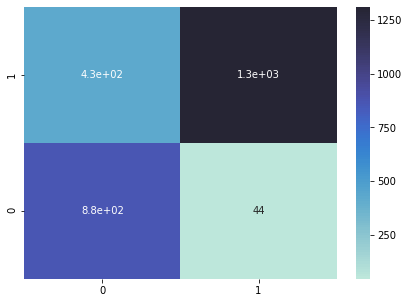

In [212]:
#matricea de confuzie
cm = confusion_matrix(pred, validation_samples['label'])
plt.figure(figsize = (7,5))
ax = sn.heatmap(df_cm, annot=True, center = 1500)
ax.set_ylim([0,2])
#plt.show()
plt.savefig("cm1.png")

## Complement Naive Bayes classifier

In [21]:
cb = ComplementNB(alpha = 0.1, norm=True) 

cb.fit(X, train_samples["label"])
pred = cb.predict(vectorizer.transform(validation_samples["text"]))
print("Validation Bayes: ", f1_score(pred, validation_samples["label"]))
print("Validation Bayes macro : ", f1_score(pred, validation_samples["label"], average = 'macro'))

# cb.fit(Y, train_labels)
# pred = cb.predict(vectorizer.transform(validation_samples["text"]))
# print("Bayes Antrenat tot: ", f1_score(pred, validation_samples["label"]))

Validation Bayes:  0.7602153943617358
Validation Bayes macro :  0.7044696461367843


In [214]:
print(classification_report(validation_samples["label"], pred))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65      1301
           1       0.67      0.89      0.76      1355

    accuracy                           0.71      2656
   macro avg       0.74      0.71      0.70      2656
weighted avg       0.74      0.71      0.71      2656



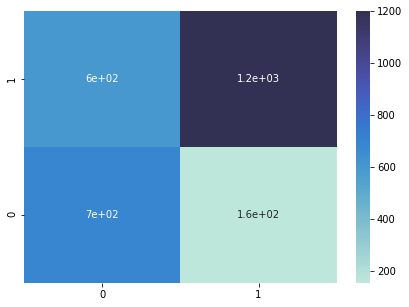

In [217]:
cm = confusion_matrix(pred, validation_samples['label'])
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (7,5))
ax = sn.heatmap(df_cm, annot=True, center = 1500)
ax.set_ylim([0,2])
# plt.show()
plt.savefig("cm2.png")

In [ ]:
predictia pentru test si scrierea in csv
pred_test = cb..predict(vectorizer.transform(test_samples["text"]))
df = pd.DataFrame()
df["id"] = test_samples["id"]
df["label"] = pred_test
df.to_csv("ComplementBayes.csv", index=False)

## GridSearch for SVM hyperparameters

In [ ]:
#parametri pe care dorim sa ii testam
parameters={'kernel': ('linear', 'rbf'), 'C':[.1, .4, .5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

svc = svm.SVC(gamma='auto')
model = GridSearchCV(svc, parameters)
model.fit(X, train_samples["label"])

#afisarea celor mai buni parametri gasiti
model.best_params_

## SVM

In [26]:
svc = svm.SVC(C = 0.4, kernel='linear', gamma='auto', probability = True, tol = 1e-3)

svc.fit(X, train_samples["label"])
pred = svc.predict(vectorizer.transform(validation_samples["text"]))
print("Validation SVM: ", f1_score(pred, validation_samples["label"]))
print("Validation SVM macro: ", f1_score(pred, validation_samples["label"], average = 'macro'))

# svc.fit(Y, train_labels)

# pred = svc.predict(vectorizer.transform(validation_samples["text"]))
# print("SVM antrenat tot: ", f1_score(pred, validation_samples["label"]))

Validation SVM:  0.7397174254317113
Validation SVM macro:  0.6749833013383286


In [14]:
print(classification_report(validation_samples["label"], pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1301
           1       0.65      0.86      0.74      1355

    accuracy                           0.69      2656
   macro avg       0.72      0.69      0.68      2656
weighted avg       0.71      0.69      0.68      2656



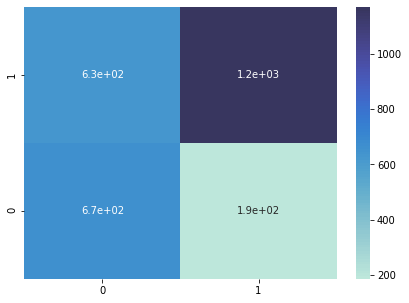

In [17]:
cm = confusion_matrix(pred, validation_samples['label'])
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (7,5))
ax = sn.heatmap(df_cm, annot=True, center = 1500)
ax.set_ylim([0,2])
# plt.show()
plt.savefig("cm5.png")

In [ ]:
#predictia pentru test si scrierea in csv
pred_test = svc.predict(vectorizer.transform(test_samples["text"]))
df = pd.DataFrame()
df["id"] = test_samples["id"]
df["label"] = pred_test
df.to_csv("SVM.csv", index=False)

## GridSearch ans Cross Validation for Naive Bayes hyperparameters

In [24]:
#gridSearch si Cross Validation pentru Multinomial Naive Bayes
grid = []
n_grams = [(5, 7), (5,6), (4,7)]
#cautam cel mai bun numar de features
for max_features in range(30000, 250000, 10000):
    for n_gram in n_grams:
        #cel mai bun umar de n-grame
        vectorizer = TfidfVectorizer(max_features=max_features, lowercase=False, analyzer = 'char', ngram_range=n_gram)
        X = vectorizer.fit_transform(train_texts)
        nb = MultinomialNB()
        #cel mai bun parametru alpha
        cv = GridSearchCV(nb, {'alpha': [1, 0.7, 0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001]}, scoring='f1', n_jobs=-1, cv=10)
        cv.fit(X, train_labels)
        grid.append((cv, max_features, n_gram))
        print(max_features, n_gram)
        print(cv.best_params_)
        print()

#sortarea mediei rezultatelor si afisarea celui mai bun
grid.sort(key = lambda x: x[0].cv_results_['mean_test_score'].mean(), reverse = True)
grid[0][0].cv_results_['mean_test_score']

30000 (5, 7)
{'alpha': 0.001}

30000 (5, 6)
{'alpha': 0.001}

30000 (4, 7)
{'alpha': 0.005}

40000 (5, 7)
{'alpha': 0.001}

40000 (5, 6)
{'alpha': 0.001}

40000 (4, 7)
{'alpha': 0.2}

50000 (5, 7)
{'alpha': 0.1}

50000 (5, 6)
{'alpha': 0.05}

50000 (4, 7)
{'alpha': 0.001}

60000 (5, 7)
{'alpha': 0.05}

60000 (5, 6)
{'alpha': 0.1}

60000 (4, 7)
{'alpha': 0.001}

70000 (5, 7)
{'alpha': 0.1}

70000 (5, 6)
{'alpha': 0.1}

70000 (4, 7)
{'alpha': 0.001}

80000 (5, 7)
{'alpha': 0.05}

80000 (5, 6)
{'alpha': 0.1}

80000 (4, 7)
{'alpha': 0.005}

90000 (5, 7)
{'alpha': 0.1}

90000 (5, 6)
{'alpha': 0.1}

90000 (4, 7)
{'alpha': 0.05}

100000 (5, 7)
{'alpha': 0.1}

100000 (5, 6)
{'alpha': 0.1}

100000 (4, 7)
{'alpha': 0.05}

110000 (5, 7)
{'alpha': 0.1}

110000 (5, 6)
{'alpha': 0.1}

110000 (4, 7)
{'alpha': 0.01}

120000 (5, 7)
{'alpha': 0.2}

120000 (5, 6)
{'alpha': 0.2}

120000 (4, 7)
{'alpha': 0.05}

130000 (5, 7)
{'alpha': 0.1}

130000 (5, 6)
{'alpha': 0.2}

130000 (4, 7)
{'alpha': 0.05}

14000

array([0.74013465, 0.74418982, 0.74926149, 0.75433303, 0.75402363,
       0.75359179, 0.75152678, 0.74732323, 0.74072081])

In [28]:
#gridSearch si Cross Validation pentru Complement Naive Bayes
gridC = []
n_grams = [(5, 7), (5,6), (4,7)]
for max_features in range(30000, 250000, 10000):
    for n_gram in n_grams:
        vectorizer = TfidfVectorizer(max_features=max_features, lowercase=False, analyzer = 'char', ngram_range=n_gram)
        X = vectorizer.fit_transform(train_texts)
        nb = ComplementNB()
        cv = GridSearchCV(nb, {'alpha': [1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]}, scoring='f1', n_jobs=-1, cv=10)
        cv.fit(X, train_labels)
        gridC.append((cv, max_features, n_gram))
        print(max_features, n_gram)
        print(cv.best_params_)
        print()
gridC.sort(key = lambda x: x[0].cv_results_['mean_test_score'].mean(), reverse = True)
gridC[0][0].cv_results_['mean_test_score']

30000 (5, 7)
{'alpha': 0.0001}

30000 (5, 6)
{'alpha': 0.0001}

30000 (4, 7)
{'alpha': 0.001}

40000 (5, 7)
{'alpha': 0.0001}

40000 (5, 6)
{'alpha': 0.001}

40000 (4, 7)
{'alpha': 0.0001}

50000 (5, 7)
{'alpha': 0.01}

50000 (5, 6)
{'alpha': 0.01}

50000 (4, 7)
{'alpha': 0.0001}

60000 (5, 7)
{'alpha': 0.005}

60000 (5, 6)
{'alpha': 0.1}

60000 (4, 7)
{'alpha': 0.0001}

70000 (5, 7)
{'alpha': 0.1}

70000 (5, 6)
{'alpha': 0.1}

70000 (4, 7)
{'alpha': 0.001}

80000 (5, 7)
{'alpha': 0.2}

80000 (5, 6)
{'alpha': 0.1}

80000 (4, 7)
{'alpha': 0.005}

90000 (5, 7)
{'alpha': 0.1}

90000 (5, 6)
{'alpha': 0.1}

90000 (4, 7)
{'alpha': 0.005}

100000 (5, 7)
{'alpha': 0.1}

100000 (5, 6)
{'alpha': 0.1}

100000 (4, 7)
{'alpha': 0.01}

110000 (5, 7)
{'alpha': 0.1}

110000 (5, 6)
{'alpha': 0.1}

110000 (4, 7)
{'alpha': 0.01}

120000 (5, 7)
{'alpha': 0.05}

120000 (5, 6)
{'alpha': 0.1}

120000 (4, 7)
{'alpha': 0.05}

130000 (5, 7)
{'alpha': 0.05}

130000 (5, 6)
{'alpha': 0.2}

130000 (4, 7)
{'alpha': 

array([0.7362271 , 0.7418522 , 0.74698449, 0.75130258, 0.75325131,
       0.75359602, 0.75389954, 0.75012552, 0.74636113, 0.73943826,
       0.72814786])

## Vote function

In [22]:
def vote(models, X):
    results = []
    for model in models:
        pred = model.predict(X)
        results.append(pred)
    n = len(results) / 2
    df = pd.DataFrame(results)
    df = df.transpose()
    df['vote'] = df.apply(lambda row: (1 if sum(row) >= n else 0), axis=1)
    return df

In [25]:
#cel mai bun rezultat obtinut pana acum(Bayes cu min_df = 0.0005, ngram_range = (5,7))
rez = pd.read_csv("BayesTry.csv")

#rezultatul de la GridSearch pentru Multinomial Naive Bayes
vectorizer = TfidfVectorizer(max_features=120000,lowercase=False, analyzer = 'char', ngram_range = (5,7))
vectorizer.fit(all_texts)
Y = vectorizer.transform(train_texts)

nb = MultinomialNB(alpha=0.2)
nb.fit(Y, train_labels)

#rezultat GridSearch pentru Complement Naive Bayes
cb = ComplementNB(0.05)
cb.fit(Y, train_labels)

df = vote([nb, cb], vectorizer.transform(test_samples["text"]))
df = df.drop("vote", axis=1)
df[2] = rez["label"]
df['vote'] = df.apply(lambda row: (1 if sum(row) >= 2 else 0), axis=1)

d = pd.DataFrame()
d["id"] = test_samples["id"]
d["label"] = df['vote']
d.to_csv("Vote.csv", index=False)